Implement noise reduction techniques using spatial and frequency domain filtering.
Tasks:
•	Add noise to an image.
•	Apply spatial filtering to reduce noise.
•	Apply frequency domain filtering to reduce noise.



# Add noise to an image

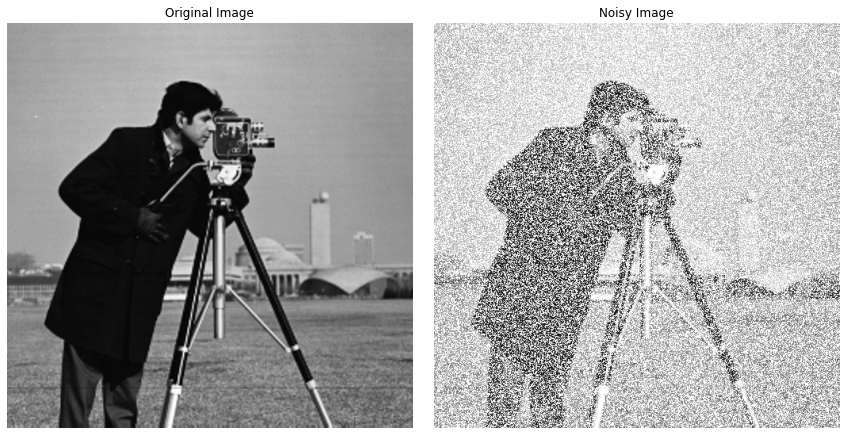

Noisy image saved at: images/noisy_image.jpg


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'images/image4.tif'
img = cv2.imread(image_path)

if img is None:
    print("Error: Could not read the image.")
else:
    # Convert to grayscale if needed
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Add Gaussian noise
    noise_sigma = 25  # Standard deviation of noise
    noise = np.random.normal(0, noise_sigma, img_gray.shape).astype(np.uint8)
    img_noisy = cv2.add(img_gray, noise)

    # Save the noisy image
    noisy_image_path = 'images/noisy_image.jpg'
    cv2.imwrite(noisy_image_path, img_noisy)

    # Display the original and noisy images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_noisy, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Noisy image saved at: {noisy_image_path}")


# Apply spatial filtering to reduce noise

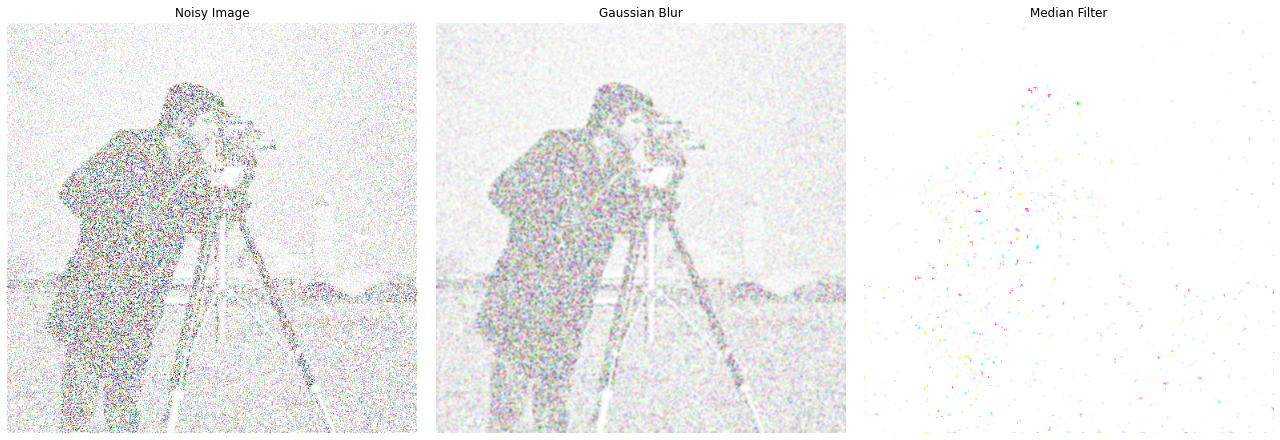

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the noisy image
image_path = 'images/noisy_image.jpg'
img = cv2.imread(image_path)
img_noisy = cv2.add(img, np.random.normal(0, 25, img.shape).astype(np.uint8))

if img_noisy is None:
    print("Error: Could not read the noisy image.")
else:
    # Apply Gaussian Blur
    img_gaussian_blur = cv2.GaussianBlur(img_noisy, (5, 5), 0)
    
    # Apply Median Filtering
    img_median_blur = cv2.medianBlur(img_noisy, 5)

    # Display the noisy and filtered images
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_noisy, cv2.COLOR_BGR2RGB))
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_gaussian_blur, cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Blur')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_median_blur, cv2.COLOR_BGR2RGB))
    plt.title('Median Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Show the images using OpenCV
    cv2.imshow('Noisy Image', img_noisy)
    cv2.imshow('Gaussian Blur', img_gaussian_blur)
    cv2.imshow('Median Filter', img_median_blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Apply frequency domain filtering to reduce noise

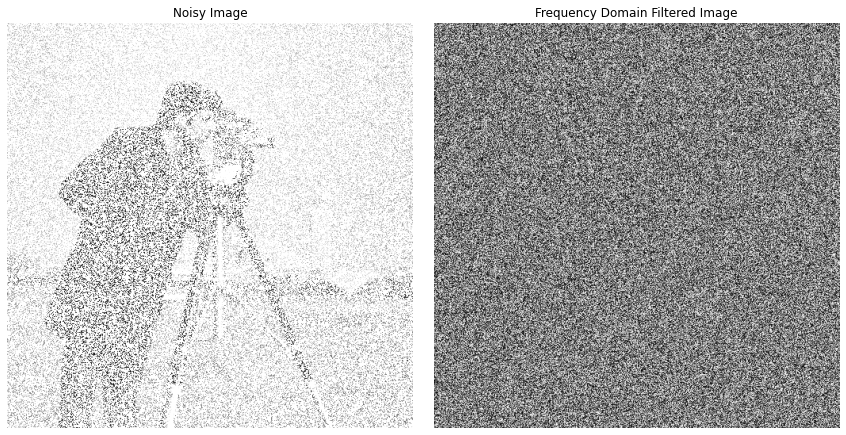

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the noisy grayscale image
image_path = 'images/noisy_image.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.add(img, np.random.normal(0, 25, img.shape).astype(np.uint8))

if img_noisy is None:
    print("Error: Could not read the noisy image.")
else:
    # Perform Fourier Transform
    dft = cv2.dft(np.float32(img_noisy), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Create a mask with a circular high-pass filter
    rows, cols = img_noisy.shape
    crow, ccol = rows // 2, cols // 2
    radius = 30
    mask = np.ones((rows, cols, 2), np.uint8)
    center = [crow, ccol]
    cv2.circle(mask, center, radius, 0, thickness=-1)

    # Apply mask and inverse DFT
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = np.uint8(img_back)

    # Display the noisy and filtered images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_noisy, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_back, cmap='gray')
    plt.title('Frequency Domain Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
